In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


In [47]:
data = pd.read_csv("bill.csv")
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [12]:
data.shape

(1372, 5)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
classifier=SVC(kernel="linear",random_state=42)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [24]:
y_pred=classifier.predict(x_test)

In [25]:
confusion_matrix(y_test,y_pred)

array([[143,   3],
       [  0, 129]], dtype=int64)

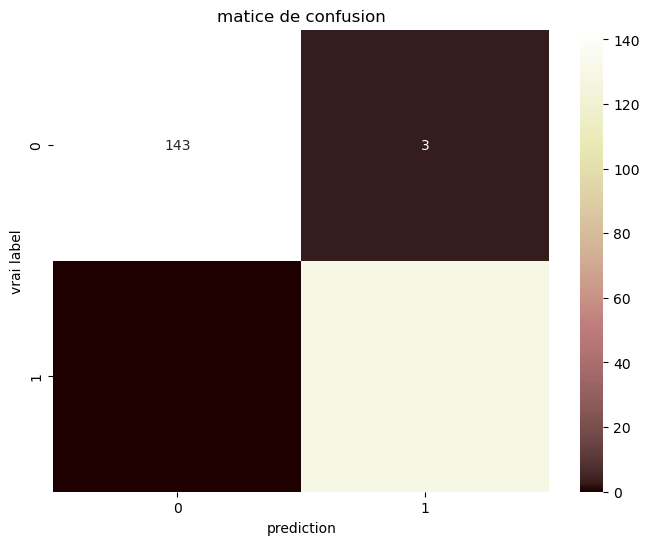

In [53]:
confusion_matrix = pd.crosstab(y_test, y_pred)

# Tracer la heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="pink", fmt="g")
plt.xlabel('prediction')
plt.ylabel('vrai label')
plt.title('matice de confusion')
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       146
           1       0.98      1.00      0.99       129

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



IndexError: invalid index to scalar variable.

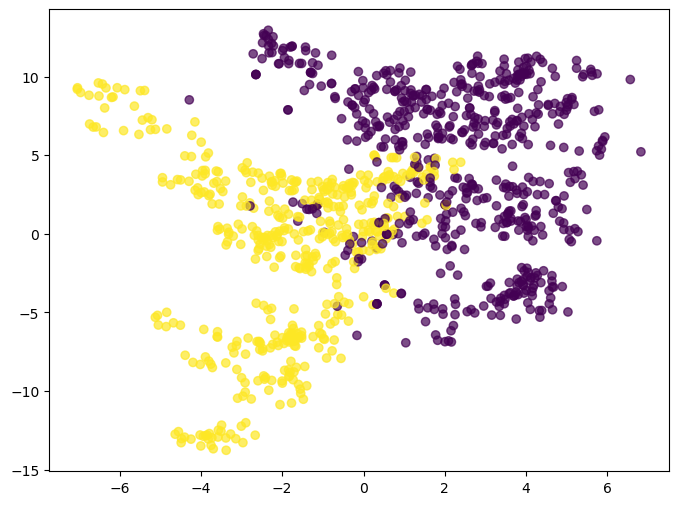

In [44]:
hyperplanes = classifier.decision_function(x_train)


# Créer le graphique
plt.figure(figsize=(8, 6))

# Tracer les points de données d'apprentissage
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', alpha=0.7)
for hyperplane in hyperplanes:
    plt.plot([hyperplane[0], hyperplane[1]], [hyperplane[1], hyperplane[2]], color='red', linewidth=2)

# Ajouter des légendes et des titres
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend()

# Afficher le graphique
plt.show()

In [56]:
from sklearn.metrics import plot_roc_curve

# Tracer la courbe ROC
plot_roc_curve(classifier, X_test, y_test)
plt.title('Courbe ROC')
plt.show()


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


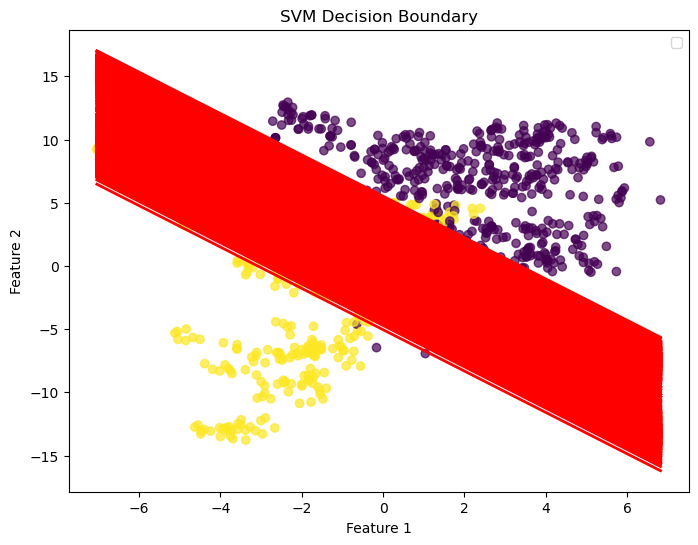

In [57]:
# Obtenir les distances signées des échantillons par rapport à l'hyperplan de décision
distances = classifier.decision_function(x_train)

# Créer le graphique
plt.figure(figsize=(8, 6))

# Tracer les points de données d'apprentissage
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', alpha=0.7)

# Tracer les hyperplans de décision
for distance in distances:
    # Coefficients de l'hyperplan de décision (a, b)
    a = classifier.coef_[0][0]
    b = classifier.coef_[0][1]
    
    # Intercept de l'hyperplan de décision (c)
    c = classifier.intercept_[0]
    
    # Calculer les coordonnées des points sur l'hyperplan de décision
    x_values = np.array([x_train[:, 0].min(), x_train[:, 0].max()])
    y_values = (-a / b) * x_values - c / b + (distance / np.sqrt(a**2 + b**2))
    
    # Tracer l'hyperplan de décision
    plt.plot(x_values, y_values, color='red', linewidth=2)

# Ajouter des légendes et des titres
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend()

# Afficher le graphique
plt.show()
